In [207]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.linalg import hadamard
import scipy.signal
import pylab
from scipy.misc import derivative

def db(x):
    """ Convert linear value to dB value """
    return 10*np.log10(abs(x))

# let's try this with FFT

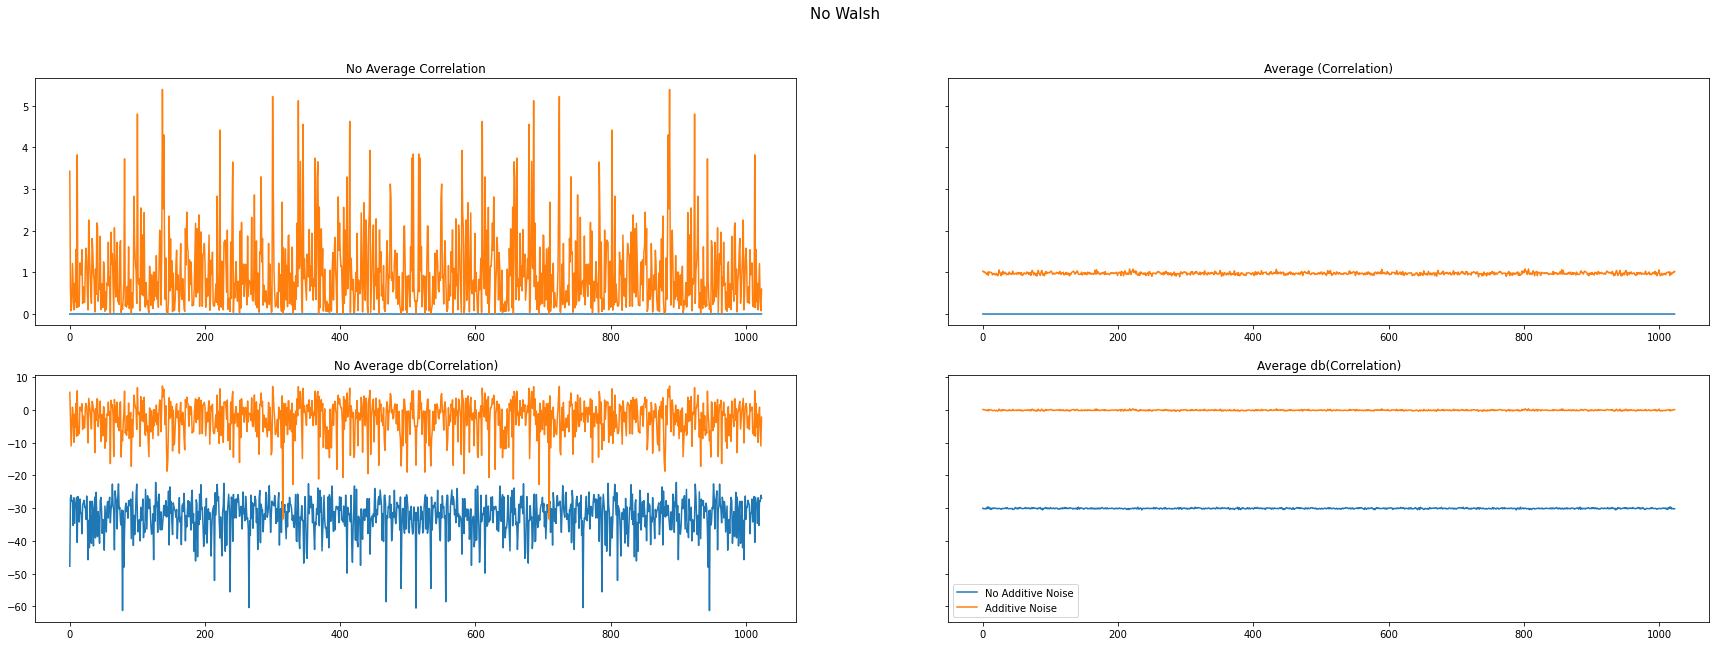

In [269]:
fig, ax = plt.subplots(2,2, figsize = (30,10), sharey='row')
nffts = 1024
num_samples = 1024
variance = 1
gain = 1


pwrsreg = []
pwrsnoise = []

for i in range(nffts):
    samples = gain*np.random.normal(0, np.sqrt(variance), num_samples) + np.random.normal(0, np.sqrt(1000*variance), num_samples)
    fftavg = np.fft.fft(samples)/num_samples
    pwr = fftavg*np.conj(fftavg)
    pwrsnoise.append(pwr)
    
for i in range(nffts):
    samples = gain*np.random.normal(0, np.sqrt(variance), num_samples)
    fftavg = np.fft.fft(samples)/num_samples
    pwr = fftavg*np.conj(fftavg)
    pwrsreg.append(pwr)


meanpwrreg = np.mean(pwrsreg, axis=0)
meanpwrnoise = np.mean(pwrsnoise, axis=0)

fig.suptitle('No Walsh', fontsize=15)

ax[0,0].plot(pwrsreg[0],label='No Additive Noise')
ax[0,0].plot(pwrsnoise[0],label='Additive Noise')
ax[0,0].set_title('No Average Correlation')

ax[0,1].plot(meanpwrreg,label='No Additive Noise')
ax[0,1].plot(meanpwrnoise,label='Additive Noise')
ax[0,1].set_title('Average (Correlation)')

ax[1,0].plot(db(pwrsreg[0]),label='No Additive Noise')
ax[1,0].plot(db(pwrsnoise[0]),label='Additive Noise')
ax[1,0].set_title('No Average db(Correlation)')
            
ax[1,1].plot(db(meanpwrreg),label='No Additive Noise')
ax[1,1].plot(db(meanpwrnoise),label='Additive Noise')
ax[1,1].set_title('Average db(Correlation)')
plt.legend()

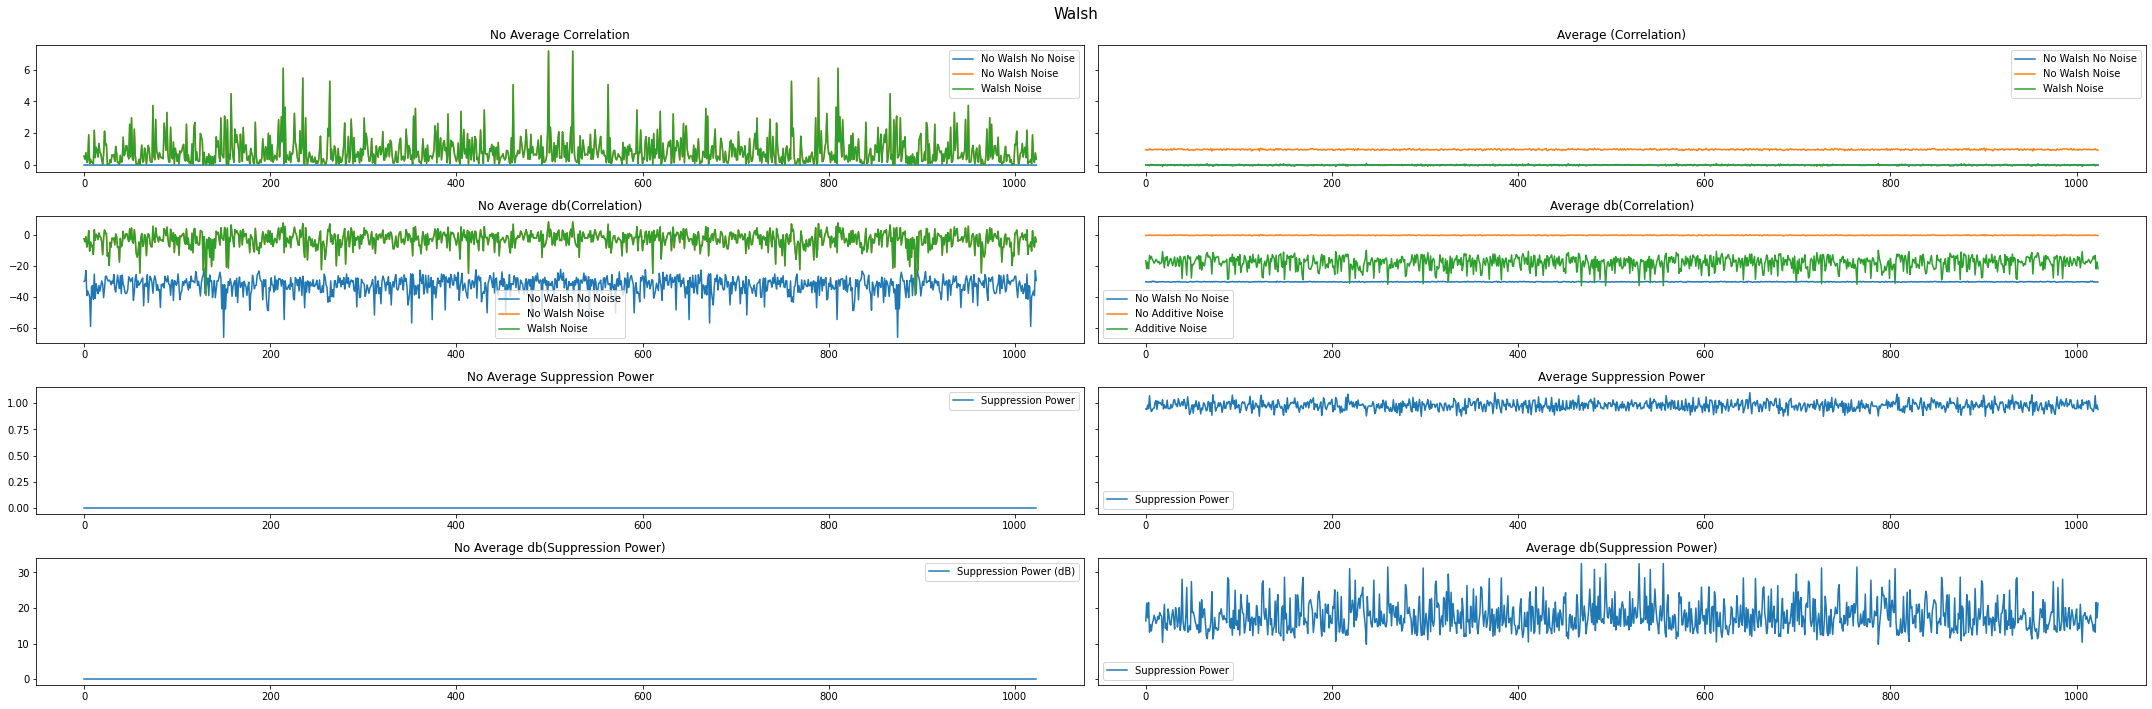

In [270]:
fig, ax = plt.subplots(4,2, figsize = (30,10), sharey='row')
nffts = 1024
num_samples = 1024
variance = 1



pwrspre = []
pwrspost = []
for i in range(nffts):
    if i < nffts//2:    
        samplessig = gain*(np.random.normal(0, np.sqrt(variance), num_samples))
        samplesnoise = np.random.normal(0, np.sqrt(1000*variance), num_samples)
        nowalsh = samplessig+samplesnoise
        walsh = samplessig+samplesnoise
        fftavgnowalsh = np.fft.fft(nowalsh)/num_samples
        fftavgwalsh = np.fft.fft(walsh)/num_samples
        pwrnowalsh = fftavgnowalsh*np.conj(fftavgnowalsh)
        pwrwalsh = fftavgwalsh*np.conj(fftavgwalsh)
        pwrspre.append(pwrnowalsh)
        pwrspost.append(pwrwalsh)
    else:
        samplessig = gain*np.random.normal(0, np.sqrt(variance), num_samples)
        samplesnoise = np.random.normal(0, np.sqrt(1000*variance), num_samples)
        nowalsh =  samplessig+samplesnoise
        walsh = -(-samplessig+samplesnoise)
        fftavgnowalsh = np.fft.fft(nowalsh)/num_samples
        fftavgwalsh = np.fft.fft(walsh)/num_samples
        pwrnowalsh = fftavgnowalsh*np.conj(fftavgnowalsh)
        pwrwalsh = fftavgwalsh*np.conj(fftavgnowalsh)
        pwrspre.append(pwrnowalsh)
        pwrspost.append(pwrwalsh)

pwrsreg = []
for i in range(nffts):
    samples = gain*np.random.normal(0, np.sqrt(variance), num_samples)
    fftavg = np.fft.fft(samples)/num_samples
    pwr = fftavg*np.conj(fftavg)
    pwrsreg.append(pwr)
    
meanpwreg = np.mean(pwrsreg, axis=0)
meanpwrpre = np.mean(pwrspre, axis=0)
meanpwrpost = np.mean(pwrspost, axis=0)

fig.suptitle('Walsh', fontsize=15)

ax[0,0].plot(pwrsreg[0],label='No Walsh No Noise')
ax[0,0].plot(pwrspre[0],label='No Walsh Noise')
ax[0,0].plot(pwrspost[0],label= 'Walsh Noise')
ax[0,0].set_title('No Average Correlation')
ax[0,0].legend()

ax[0,1].plot(meanpwreg,label='No Walsh No Noise')
ax[0,1].plot(meanpwrpre,label='No Walsh Noise')
ax[0,1].plot(meanpwrpost,label= 'Walsh Noise')
ax[0,1].set_title('Average (Correlation)')
ax[0,1].legend()

ax[1,0].plot(db(pwrsreg[0]),label='No Walsh No Noise')
ax[1,0].plot(db(pwrspre[0]),label='No Walsh Noise')
ax[1,0].plot(db(pwrspost[0]),label= 'Walsh Noise')
ax[1,0].set_title('No Average db(Correlation)')
ax[1,0].legend()

ax[1,1].plot(db(meanpwrreg),label='No Walsh No Noise')
ax[1,1].plot(db(meanpwrpre),label='No Additive Noise')
ax[1,1].plot(db(meanpwrpost),label='Additive Noise')
ax[1,1].set_title('Average db(Correlation)')
ax[1,1].legend()


ax[2,0].plot(pwrspre[0]-pwrspost[0],label='Suppression Power')
ax[2,0].set_title('No Average Suppression Power')
ax[2,0].legend()

ax[3,0].plot(db(pwrspre[0])-db(pwrspost[0]),label='Suppression Power (dB)')
ax[3,0].set_title('No Average db(Suppression Power)')
ax[3,0].legend()


ax[2,1].plot(meanpwrpre-meanpwrpost,label='Suppression Power')
ax[2,1].set_title('Average Suppression Power')
ax[2,1].legend()

ax[3,1].plot(db(meanpwrpre)-db(meanpwrpost),label='Suppression Power')
ax[3,1].set_title('Average db(Suppression Power)')
ax[3,1].legend()

plt.tight_layout()

# Vary Variances

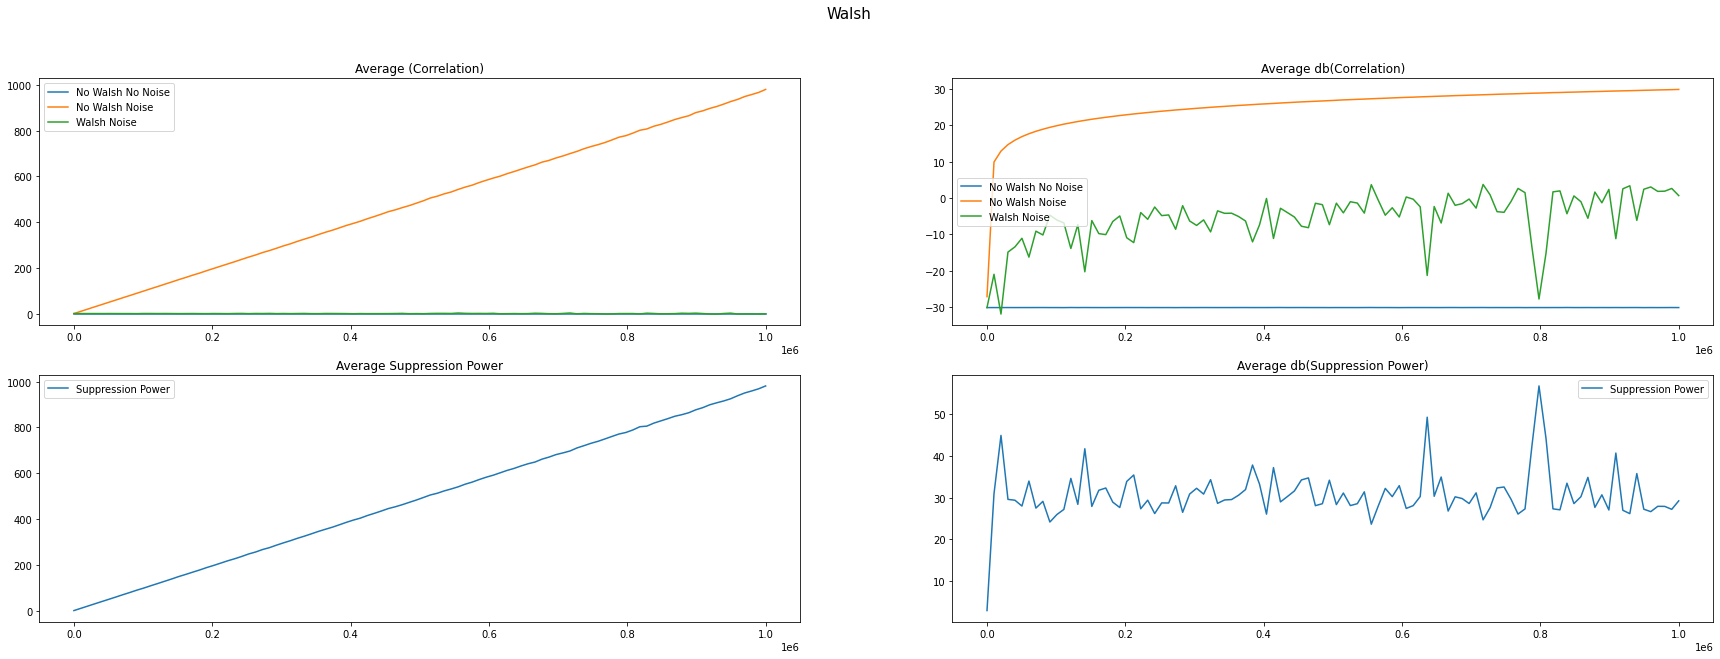

In [271]:
fig, ax = plt.subplots(2,2, figsize = (30,10))
nffts = 1024
num_samples = 1024
variance_fixed = 1
variances = np.linspace(variance_fixed,1000000,100)


prepwr = []
postpwr = []
pwrsorig = []

for j in range(len(variances)):
    pwrspre = []
    pwrspost = []
    pwrsreg = []
    for i in range(nffts):
        if i < nffts//2:    
            samplessig = np.random.normal(0, np.sqrt(variance_fixed), num_samples)
            samplesnoise = np.random.normal(0, np.sqrt(variances[j]), num_samples)
            nowalsh =  samplessig+samplesnoise
            walsh = samplessig+samplesnoise
            fftavgnowalsh = np.fft.fft(nowalsh)/num_samples
            fftavgwalsh = np.fft.fft(walsh)/num_samples
            pwrnowalsh = fftavgnowalsh*np.conj(fftavgnowalsh)
            pwrwalsh = fftavgwalsh*np.conj(fftavgnowalsh)
            pwrspre.append(pwrnowalsh)
            pwrspost.append(pwrwalsh)
        else:
            samplessig = gain*np.random.normal(0, np.sqrt(variance_fixed), num_samples)
            samplesnoise = np.random.normal(0, np.sqrt(variances[j]), num_samples)
            nowalsh =  samplessig+samplesnoise
            walsh = samplessig-samplesnoise
            fftavgnowalsh = np.fft.fft(nowalsh)/num_samples
            fftavgwalsh = np.fft.fft(walsh)/num_samples
            pwrnowalsh = fftavgnowalsh*np.conj(fftavgnowalsh)
            pwrwalsh = fftavgwalsh*np.conj(fftavgnowalsh)
            pwrspre.append(pwrnowalsh)
            pwrspost.append(pwrwalsh)
        

        samples = gain*np.random.normal(0, np.sqrt(variance_fixed), num_samples)
        fftavg = np.fft.fft(samples)/num_samples
        pwr = fftavg*np.conj(fftavg)
    
        pwrsreg.append(pwr)
            
    meanpwrpre = np.mean(pwrspre, axis=0)
    meanpwrpost = np.mean(pwrspost, axis=0)
    meanpwrreg = np.mean(pwrsreg, axis=0)
    
    prepwr.append(np.mean(meanpwrpre))
    postpwr.append(np.mean(meanpwrpost))
    pwrsorig.append(np.mean(meanpwrreg))


fig.suptitle('Walsh', fontsize=15)

prepwr = np.array(prepwr)
postpwr = np.array(postpwr)
pwrsorig = np.array(pwrsorig)



ax[0,0].plot(variances, pwrsorig,label='No Walsh No Noise')
ax[0,0].plot(variances, prepwr,label='No Walsh Noise')
ax[0,0].plot(variances, postpwr,label= 'Walsh Noise')
ax[0,0].set_title('Average (Correlation)')
ax[0,0].legend()



ax[0,1].plot(variances,db(pwrsorig),label='No Walsh No Noise')
ax[0,1].plot(variances,db(prepwr),label='No Walsh Noise')
ax[0,1].plot(variances,db(postpwr),label='Walsh Noise')
ax[0,1].set_title('Average db(Correlation)')
ax[0,1].legend()



ax[1,0].plot(variances,prepwr-postpwr,label='Suppression Power')
ax[1,0].set_title('Average Suppression Power')
ax[1,0].legend()

ax[1,1].plot(variances,db(prepwr)-db(postpwr),label='Suppression Power')
ax[1,1].set_title('Average db(Suppression Power)')
ax[1,1].legend()

# Vary Nffts

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (30,10))
nffts = np.linspace(1024,1024*10000,100)
num_samples = 1024
variance_fixed = 1
print(nffts)

prepwr = []
postpwr = []
pwrsorig = []

for j in range(len(nffts)):
    pwrspre = []
    pwrspost = []
    pwrsreg = []
    for i in range(int(nffts[j])):
        if i < int(nffts[j])//2:    
            samplessig = np.random.normal(0, np.sqrt(variance_fixed), num_samples)
            samplesnoise = np.random.normal(0, np.sqrt(10000*variance_fixed), num_samples)
            nowalsh =  samplessig+samplesnoise
            walsh = samplessig+samplesnoise
            fftavgnowalsh = np.fft.fft(nowalsh)/num_samples
            fftavgwalsh = np.fft.fft(walsh)/num_samples
            pwrnowalsh = fftavgnowalsh*np.conj(fftavgnowalsh)
            pwrwalsh = fftavgwalsh*np.conj(fftavgwalsh)
            pwrspre.append(pwrnowalsh)
            pwrspost.append(pwrwalsh)
        else:
            samplessig = gain*np.random.normal(0, np.sqrt(variance_fixed), num_samples)
            samplesnoise = np.random.normal(0, np.sqrt(1000*variance_fixed), num_samples)
            nowalsh =  samplessig+samplesnoise
            walsh = samplessig-samplesnoise
            fftavgnowalsh = np.fft.fft(nowalsh)/num_samples
            fftavgwalsh = np.fft.fft(walsh)/num_samples
            pwrnowalsh = fftavgnowalsh*np.conj(fftavgnowalsh)
            pwrwalsh = fftavgwalsh*np.conj(fftavgwalsh)
            pwrspre.append(pwrnowalsh)
            pwrspost.append(pwrwalsh)
        

        samples = gain*np.random.normal(0, np.sqrt(variance_fixed), num_samples)
        fftavg = np.fft.fft(samples)/num_samples
        pwr = fftavg*np.conj(fftavg)
    
        pwrsreg.append(pwr)
        
    meanpwrpre = np.mean(pwrspre, axis=0)
    meanpwrpost = np.mean(pwrspost, axis=0)
    meanpwrreg = np.mean(pwrsreg, axis=0)
    
    prepwr.append(np.mean(meanpwrpre))
    postpwr.append(np.mean(meanpwrpost))
    pwrsorig.append(np.mean(meanpwrreg))


prepwr = np.array(prepwr)
postpwr = np.array(postpwr)
pwrsorig = np.array(pwrsorig)


prepwr = np.array(prepwr)
postpwr = np.array(postpwr)
pwrsorig = np.array(pwrsorig)



ax[0,0].plot(nffts, pwrsorig,label='No Walsh No Noise')
ax[0,0].plot(nffts, prepwr,label='No Walsh Noise')
ax[0,0].plot(nffts, postpwr,label= 'Walsh Noise')
ax[0,0].set_title('Average (Correlation)')
ax[0,0].legend()



ax[0,1].plot(nffts,db(pwrsorig),label='No Walsh No Noise')
ax[0,1].plot(nffts,db(prepwr),label='No Walsh Noise')
ax[0,1].plot(nffts,db(postpwr),label='Walsh Noise')
ax[0,1].set_title('Average db(Correlation)')
ax[0,1].legend()



ax[1,0].plot(nffts,postpwr-prepwr,label='Suppression Power')
ax[1,0].set_title('Average Suppression Power')
ax[1,0].legend()

ax[1,1].plot(nffts,db(postpwr)-db(prepwr),label='Suppression Power')
ax[1,1].set_title('Average db(Suppression Power)')
ax[1,1].legend()

[1.0240000e+03 1.0444800e+05 2.0787200e+05 3.1129600e+05 4.1472000e+05
 5.1814400e+05 6.2156800e+05 7.2499200e+05 8.2841600e+05 9.3184000e+05
 1.0352640e+06 1.1386880e+06 1.2421120e+06 1.3455360e+06 1.4489600e+06
 1.5523840e+06 1.6558080e+06 1.7592320e+06 1.8626560e+06 1.9660800e+06
 2.0695040e+06 2.1729280e+06 2.2763520e+06 2.3797760e+06 2.4832000e+06
 2.5866240e+06 2.6900480e+06 2.7934720e+06 2.8968960e+06 3.0003200e+06
 3.1037440e+06 3.2071680e+06 3.3105920e+06 3.4140160e+06 3.5174400e+06
 3.6208640e+06 3.7242880e+06 3.8277120e+06 3.9311360e+06 4.0345600e+06
 4.1379840e+06 4.2414080e+06 4.3448320e+06 4.4482560e+06 4.5516800e+06
 4.6551040e+06 4.7585280e+06 4.8619520e+06 4.9653760e+06 5.0688000e+06
 5.1722240e+06 5.2756480e+06 5.3790720e+06 5.4824960e+06 5.5859200e+06
 5.6893440e+06 5.7927680e+06 5.8961920e+06 5.9996160e+06 6.1030400e+06
 6.2064640e+06 6.3098880e+06 6.4133120e+06 6.5167360e+06 6.6201600e+06
 6.7235840e+06 6.8270080e+06 6.9304320e+06 7.0338560e+06 7.1372800e+06
 7.240